import zeugs

In [11]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [18]:
from IPython.display import Audio

In [25]:
sr= 44100

<Container object of 3 artists>

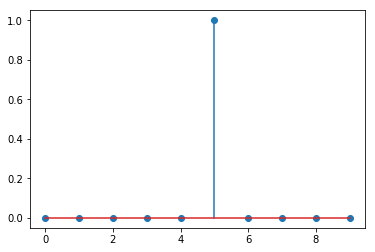

In [17]:
impulse = zeros(10)
impulse[5] = 1
stem(impulse)

In [24]:
T = 1 # length in seconds
N = int(T*sr)
noise = random.random(N)

In [21]:
Audio(data=noise, rate=sr)

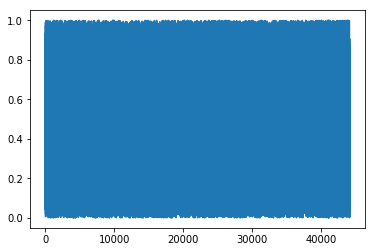

In [22]:
plot(noise)

In [30]:
newNoise = (noise-0.5)*2

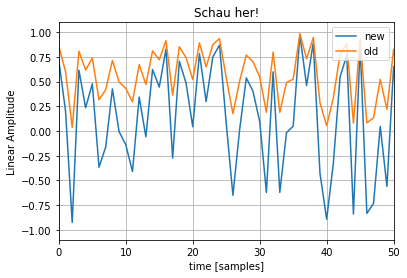

In [40]:
plot(newNoise, label='new')
plot(noise, label='old')
xlim([0,50])
legend(loc='upper right')
grid()
title("Schau her!")
xlabel('time [samples]')
ylabel('Linear Amplitude')
show()

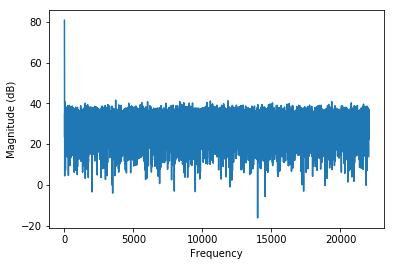

In [29]:
magnitude_spectrum(noise,Fs = sr,scale="dB")

show()

$f(t) = sin(2\pi t f) $

$f(t) = sin(2\pi t f) $

In [43]:
arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
T = 1 # esamt zeit in sekunden
sr = 44100
N = sr*T #anzahl samples gesamt
n = arange(N) # index in samples
t = n/sr #time in seconds (array)

In [49]:
# plot(t)

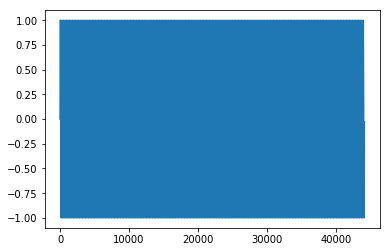

In [51]:
f = 200 #freq [Hz]
o = sin(2*pi*t*f)
plot(o)

In [52]:
Audio(data=o, rate=sr)

In [102]:
def meineDistortion(x):
    verstaerkt = x *2
    y = clip(verstaerkt,-1,1)
    return y

In [103]:
verzerrt = meineDistortion(o)
Audio(data=verzerrt, rate=sr)

In [104]:
from scipy.io import wavfile

In [105]:
sr, data =wavfile.read("drumLoop.wav")
mono = (data[:,0]+data[:,1])/2 #mono convertierung

In [106]:
# plot(datam)

In [107]:
dataVerzerrt = meineDistortion(mono)

In [108]:
Audio(data=dataVerzerrt,rate=sr)

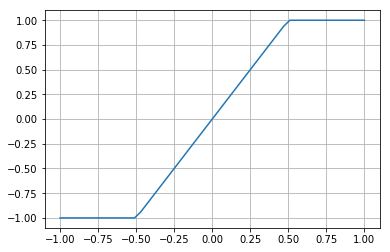

In [109]:
x = linspace(-1,1,50)
y = meineDistortion(x)
grid()
plot(x,y)

In [ ]:
T = 10 #duration [sec]
sr = 44100
N = T*sr
n = arange(N)
t = n/sr

In [118]:
f = linspace(20, 22000/2, N)

In [119]:
sweep = sin(2*pi*t*f)

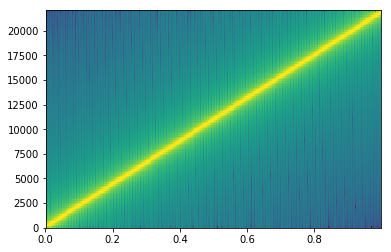

In [120]:
specgram(sweep, Fs=sr)
show()

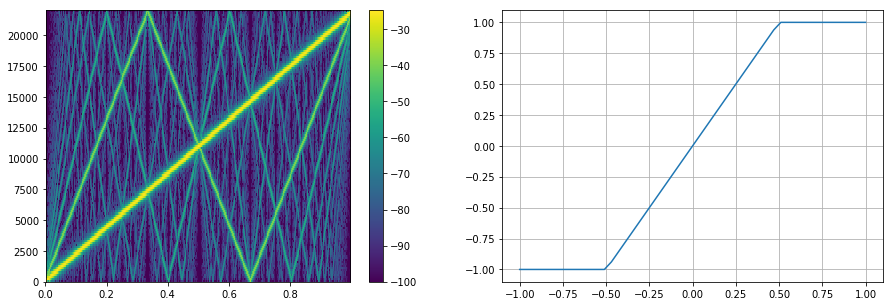

In [129]:
figure(figsize=[15,5])
subplot(121)
specgram(meineDistortion(sweep), Fs=sr, vmin=-100)
colorbar()
subplot(122)
x = linspace(-1,1,50)
y = meineDistortion(x)
grid()
plot(x,y)

In [133]:
# Audio(data=sweep, rate=sr)

In [135]:
import scipy.signal as sig

In [143]:
def bla(hsagjdsa):
    return hsagjdsa


IndentationError: expected an indented block (<ipython-input-143-6d107de94f3a>, line 2)

In [144]:
len(zeros(5))

5

In [136]:
def upsampledDist(x, factor = 2):
    N = len(x)
    newN = N*factor
    upsampled = sig.resample(x,newN)
    verzerrt = meineDistortion(upsampled)
    y = sig.resample(verzerrt, N)
    return y

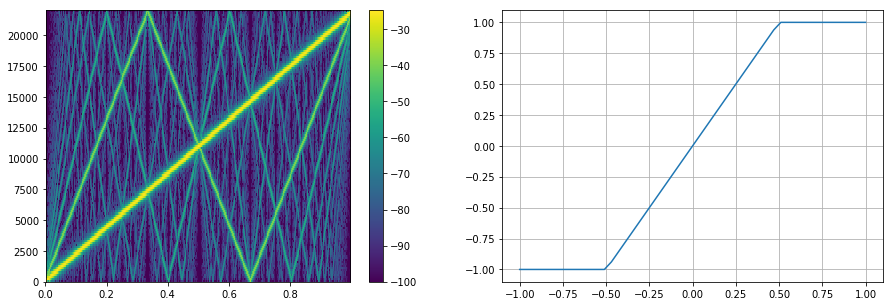

In [148]:
figure(figsize=[15,5])
subplot(121)
outputDist = upsampledDist(sweep, factor=1)
specgram(outputDist, Fs=sr, vmin=-100)
colorbar()
subplot(122)
x = linspace(-1,1,50)
y = meineDistortion(x)
grid()
plot(x,y)

In [149]:
Audio(data= outputDist, rate = sr)

In [153]:
pwd

'/root/Projects/python/iPythonNoteBook/ASBAS'

In [151]:
wavfile.write("sweep.wav",sr,sweep)

In [154]:
import os

In [157]:
allFiles = os.listdir(".")

In [ ]:
for file in allFiles:
    

/root/miniconda2/envs/findRefrain3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


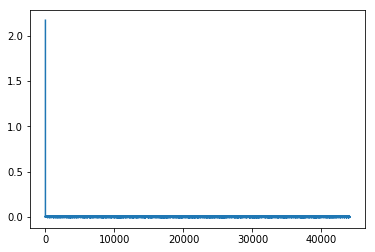

In [150]:
spec = fft.fft(sweep)
logSpec = log10(spec)
cep = fft.ifft(logSpec)
plot(cep)

In [158]:
ba = sig.butter(3,0.5)

In [166]:
ba.sha

(array([ 0.16666667,  0.5       ,  0.5       ,  0.16666667]),
 array([  1.00000000e+00,  -2.77555756e-16,   3.33333333e-01,
         -1.85037171e-17]))

In [169]:
ba[0]

array([ 0.16666667,  0.5       ,  0.5       ,  0.16666667])

In [170]:
ba[1]

array([  1.00000000e+00,  -2.77555756e-16,   3.33333333e-01,
        -1.85037171e-17])

In [163]:
impulse = zeros(100)
impulse[5] = 1

In [164]:
y = sig.lfilter(ba[0], ba[1],impulse)

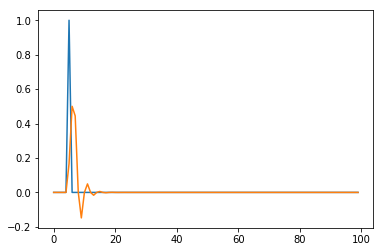

In [167]:
plot(impulse)
plot(y)

In [ ]:
# upsampledDist(sweep)